## Customer Segmentation using Unsupervised Machine Learning 

### 1. Project Background

Customer segmentation is a critical strategy in modern business analytics that enables companies to understand and categorize their customer base. It involves breaking down a customer base into distinct groups with similar characteristics- such as spending habits or product interests. Rather than treating all customers uniformly, businesses can tailor their marketing strategies, product offerings, and services to meet the specific needs of different customer segments.

Traditional segmentation approaches often rely on predefined business rules or demographic categories. However, unsupervised machine learning techniques, particularly clustering algorithms, offer a data-driven alternative that can uncover hidden patterns and natural groupings within customer data that might not be immediately obvious to human analysts.

In this project, I employed unsupervised clustering methods to segment customers. By identifying these segments, businesses can:

- Personalize marketing campaigns to resonate with specific customer groups
- Optimize product recommendations based on segment preferences
- Improve customer retention by understanding the needs of different groups
- Allocate resources more efficiently by focusing on high-value segments
- Enhance customer experience through targeted service improvements

The insights gained from this analysis can inform strategic decisions across marketing, product development, and customer service departments, ultimately leading to increased customer satisfaction and business profitability.

### 2. Load Data & Necessary Libraries

In [156]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler,RobustScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


In [137]:
data= pd.read_csv(r'D:\Customer_Segementation_with_Unsupervised_Learning\dataset\Customer_data.csv')
data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


**Background behind the Data**

The data contains information about purchases made by customers in our hypothetical store,let's call it, '***Wamz General Stores***'. The dataset includes the following features:

- master_id: Unique client number
- order_channel: Which channel of the shopping platform is used (Android, ios, Desktop, Mobile)
- last_order_channel: The channel where the last purchase was made
- first_order_date: The date of the first purchase made by the customer
- last_order_date: The date of the customer's last purchase
- last_order_date_online: The date of the last purchase made by the customer on the online platform
- last_order_date_offline: The date of the last purchase made by the customer on the offline platform
- order_num_total_ever_online: The total number of purchases made by the customer on the online platform
- order_num_total_ever_offline: Total number of purchases made by the customer offline
- customer_value_total_ever_offline: The total price paid by the customer for offline purchases
- customer_value_total_ever_online: The total price paid by the customer for their online shopping
- interested_in_categories_12: List of categories the customer has purchased from in the last 12 months

### 3. Data Cleaning & Preparation

In [138]:
#let's start by checking the data for missingness
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

The data has no missing values.

In [139]:
#Now check for duplicates
data[data.duplicated()]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12


No, rows means the data also has no duplicates

The next cleaning step, would be to check for data types and data consistency.

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

Next, we can change all the temporal feeatures into the appropriate date-time objects

In [141]:
data.columns.to_list()

['master_id',
 'order_channel',
 'last_order_channel',
 'first_order_date',
 'last_order_date',
 'last_order_date_online',
 'last_order_date_offline',
 'order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'interested_in_categories_12']

In [142]:
date_cols=['first_order_date','last_order_date','last_order_date_online','last_order_date_offline']

In [143]:
for col in date_cols:
    data[col] = pd.to_datetime(data[col])


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

### 4. Feature Engineering

Machine learning algorithms do not understand dates the same way we humans do. Models only see and understand numbers (more specifically distance). So the difference between 31-12-2025 and 01-01-2026, for us humans, that is only one day, but for a model that is

```31122025 - 01012026 = 3010999```

And this make absolutely no sense!! So, when you have date-time features, unless its a time-series analysis, you have to convert the date-time features into more meaningful metrics.

In [145]:
#Calculate days_since_last_purchase- how many days ago did the customer last make a purchase
reference_date=pd.to_datetime(data['last_order_date'].max()) + pd.Timedelta(days=1)
data['days_since_last_purchase']=( reference_date- data['last_order_date']).dt.days
data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,days_since_last_purchase
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],94
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",104
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",185
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",134
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],85


Next we calculate the days since the first purchase- that signifies how long the customer has been 
with the business

In [146]:
#days since first purchase
data['days_since_first_purchase']=(reference_date-data['first_order_date']).dt.days
data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,days_since_last_purchase,days_since_first_purchase
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],94,213
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",104,1573
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",185,551
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",134,145
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],85,667


After learning how long a customer has been with a business, we can look to extract something like, average purchases per day- it would help to organise the customers into high-frequency shoppers and low-frequency shoppers.

We could also include the average daily spend, which is the total revenue from both online ad offline divided by how long the customer has been with the business(days since first purchase)

In [147]:
#purchases per day
#first we get the total no. of purchase & total revenue - combine offline +online
data['total_purchases']=data['order_num_total_ever_online']+data['order_num_total_ever_offline']
data['total_value']=data['customer_value_total_ever_online']+ data['customer_value_total_ever_offline']

#with that now we can calculate the avg daily purchases
data['avg_daily_purchase']= data['total_purchases'] / data['days_since_first_purchase']
data['avg_daily_value']=data['total_value'] / data['days_since_first_purchase']


#next os
data.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,days_since_last_purchase,days_since_first_purchase,total_purchases,total_value,avg_daily_purchase,avg_daily_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],94,213,5.0,939.37,0.023474,4.410188
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",104,1573,21.0,2013.55,0.013350,1.280070


Next, we could consider average spending rate for both online and offline. I mean, on average how much does a customer spend when they purchase their orders online vs offline

In [148]:
data['online_spending_ratio']=data['customer_value_total_ever_online']/data['order_num_total_ever_online']
data['offline_spending_ratio']=data['customer_value_total_ever_offline']/data['order_num_total_ever_offline']
data.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,days_since_last_purchase,days_since_first_purchase,total_purchases,total_value,avg_daily_purchase,avg_daily_value,online_spending_ratio,offline_spending_ratio
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],94,213,5.0,939.37,0.023474,4.410188,199.845000,139.990
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",104,1573,21.0,2013.55,0.013350,1.280070,97.556842,79.985


The final feature we can extract is looking at the number of categories our customers typically purchase from. We will need some simple string methods to make it work

In [149]:
data['interested_in_categories_12']=data['interested_in_categories_12'].str.replace('[',' ')
data['interested_in_categories_12']=data['interested_in_categories_12'].str.replace(']',' ')
data.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,days_since_last_purchase,days_since_first_purchase,total_purchases,total_value,avg_daily_purchase,avg_daily_value,online_spending_ratio,offline_spending_ratio
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,KADIN,94,213,5.0,939.37,0.023474,4.410188,199.845000,139.990
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"ERKEK, COCUK, KADIN, AKTIFSPOR",104,1573,21.0,2013.55,0.013350,1.280070,97.556842,79.985


In [150]:
data['no_of_categories_interested_in']=data['interested_in_categories_12'].str.split().str.len()
data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,interested_in_categories_12,days_since_last_purchase,days_since_first_purchase,total_purchases,total_value,avg_daily_purchase,avg_daily_value,online_spending_ratio,offline_spending_ratio,no_of_categories_interested_in
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,...,KADIN,94,213,5.0,939.37,0.023474,4.410188,199.845000,139.990,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,...,"ERKEK, COCUK, KADIN, AKTIFSPOR",104,1573,21.0,2013.55,0.013350,1.280070,97.556842,79.985,4
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,...,"ERKEK, KADIN",185,551,5.0,585.32,0.009074,1.062287,131.783333,94.985,2
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,...,"AKTIFCOCUK, COCUK",134,145,2.0,121.97,0.013793,0.841172,81.980000,39.990,2
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,...,AKTIFSPOR,85,667,2.0,209.98,0.002999,0.314813,159.990000,49.990,1


That is enough, but also not an exhaustive list of all the possible features we can extract from the data.  **What other features can you think of that we can feature engineer? Please feel free to add as many as you can justify!!!**

### 5. Exploratory Data Analysis (Student Led)

**Univariate Analysis**

**Bivariate Analysis**

**Multivariate Analysis**

### 6. Data Preprocessing 

In [151]:
'''I am going to drop all the temporal data, the ,master_id because identifiers are useless
and of course the interested catergories'''

data.drop(columns=['master_id','first_order_date','last_order_date',
                   'last_order_date_online','last_order_date_offline','interested_in_categories_12'],
                   inplace=True)


In [152]:
data.head()

,order_channel,last_order_channel,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,days_since_last_purchase,days_since_first_purchase,total_purchases,total_value,avg_daily_purchase,avg_daily_value,online_spending_ratio,offline_spending_ratio,no_of_categories_interested_in
0,Android App,Offline,4.0,1.0,139.99,799.38,94,213,5.0,939.37,0.023474,4.410188,199.845000,139.990,1
1,Android App,Mobile,19.0,2.0,159.97,1853.58,104,1573,21.0,2013.55,0.013350,1.280070,97.556842,79.985,4
2,Android App,Android App,3.0,2.0,189.97,395.35,185,551,5.0,585.32,0.009074,1.062287,131.783333,94.985,2
3,Android App,Android App,1.0,1.0,39.99,81.98,134,145,2.0,121.97,0.013793,0.841172,81.980000,39.990,2
4,Desktop,Desktop,1.0,1.0,49.99,159.99,85,667,2.0,209.98,0.002999,0.314813,159.990000,49.990,1


##### 6.1 Feature Encoding

In [153]:
#extract the categorical features from the dataset for encodinh
num_df=data.select_dtypes(include=[np.number])
cat_df=data.select_dtypes(include=[object])

In [154]:
ohe=OneHotEncoder(sparse_output=False)
ohe_transform=ohe.fit_transform(cat_df)
encoded_df = pd.DataFrame(ohe_transform, columns=ohe.get_feature_names_out(cat_df.columns))
encoded_df.index = cat_df.index
final_df=pd.concat([num_df,encoded_df],axis=1)
final_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,days_since_last_purchase,days_since_first_purchase,total_purchases,total_value,avg_daily_purchase,avg_daily_value,...,no_of_categories_interested_in,order_channel_Android App,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Android App,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline
0,4.0,1.0,139.99,799.38,94,213,5.0,939.37,0.023474,4.410188,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19.0,2.0,159.97,1853.58,104,1573,21.0,2013.55,0.013350,1.280070,...,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,2.0,189.97,395.35,185,551,5.0,585.32,0.009074,1.062287,...,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,39.99,81.98,134,145,2.0,121.97,0.013793,0.841172,...,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,49.99,159.99,85,667,2.0,209.98,0.002999,0.314813,...,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##### 6.2 Feature Scaling

In [155]:
scaler=RobustScaler()
X_scaled=scaler.fit_transform(final_df)

### 7. Clustering algorithms

##### 7.1 Customer Segmentation with Hierarchical clustering

In [160]:
#Hierarchical clustering will help us identify any natural groupings in the dataset, and this can help 
# sort of figure out an appropriate value for k in the subsequent method

# Create linkage matrix using Ward's method
wards_clustering = linkage(X_scaled, method="ward")

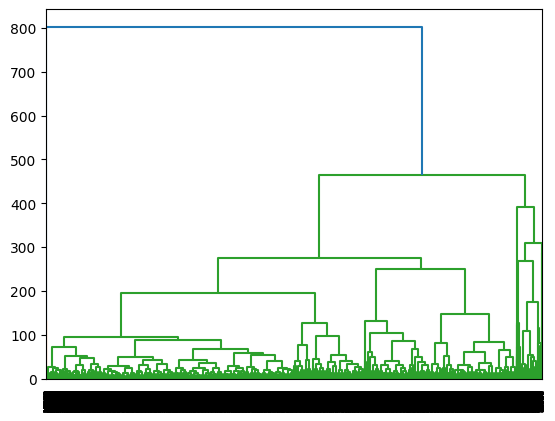

In [161]:
dendrogram(wards_clustering)
plt.show()

How to interpret a dendogram!!!


##### 7.2 Customer Segmentation with K-means clustering

In [162]:
kmeans = KMeans(n_clusters=5, random_state=0,init='k-means++',n_init="auto").fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


print(centroids)
print("\nCluster Labels for Data Points:")
print(labels)

[[ 3.37704055e+00  2.41627172e+00  1.32040863e+00  4.37167333e+00
  -1.83487834e-01  8.83262268e-01  3.84913112e+00  3.73739808e+00
   3.30806507e+00  3.89988376e+00  6.31983950e-01  4.83888258e-01
   1.56003160e+00  6.36650869e-01  4.89731438e-02  1.82464455e-01
   1.31911532e-01  4.83412322e-01  9.95260664e-02  1.05845182e-01
   1.00315956e-01  2.10900474e-01]
 [ 2.22789116e-02  7.81313776e-01  2.43120539e-01  1.22483633e-01
   1.52927256e-01 -1.35326435e-01 -5.06164966e-02  4.86392858e-02
   2.55696401e-01  2.92638270e-01  2.53362359e-01  2.39570424e-01
   4.64732143e-01  4.95216837e-01  1.11352041e-01  1.45727041e-01
   2.47704082e-01  3.58673469e-01  8.18239796e-02  8.95408163e-02
   1.71173469e-01  2.98788265e-01]
 [ 1.16666667e+00  1.00000000e+00  4.15904173e+01  3.81631307e+01
  -4.33962264e-01 -1.81034483e+00  1.16666667e+00  4.55747669e+01
   1.74915483e+01  3.92270211e+02  2.55231215e+01  3.72067081e+01
   1.00000000e+00  5.00000000e-01  0.00000000e+00  5.00000000e-01
   0.0

We can evaluate performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a higher score represents a better fit.

In [163]:
silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')

0.2606954672910882

### Choosing the best value of k

The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k. We typically make a decision using the Elbow method to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few. 

- **1. The Elbow Method**
The Elbow Method is based on analyzing the within-cluster sum of squares (WCSS), also called inertia. It works by plotting the total WCSS against different values of 𝑘 (number of clusters) and identifying the "elbow point" where the rate of decrease sharply changes

- **2.The Silhouette Method**
The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters.

In [164]:
inertias = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0,init='k-means++',n_init="auto").fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

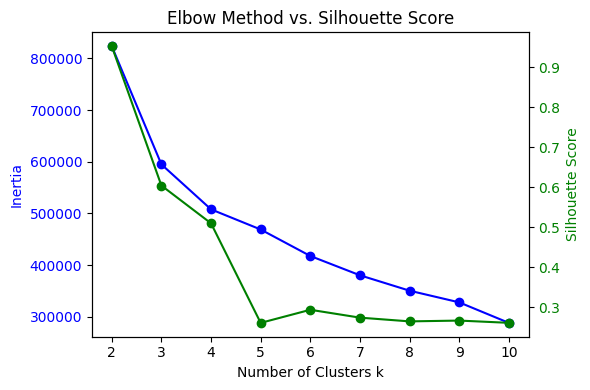

In [165]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# Inertia (Elbow Method)
ax1.plot(k_range, inertias, 'bo-', label='Inertia (Elbow)')
ax1.set_xlabel('Number of Clusters k')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params(axis='y', labelcolor='b')

#Silhouette Score
ax2 = ax1.twinx()
ax2.plot(k_range, sil_scores, 'go-', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Elbow Method vs. Silhouette Score')
fig.tight_layout()
plt.show()

#### 7.3 Customer Segmentation with Gaussian Mixture Models

In [166]:
# Initialize Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=4,covariance_type='full', random_state=42)

# Fit the model
gmm.fit(X_scaled)

# Get cluster labels and probabilities
labels = gmm.predict(X_scaled)
probs = gmm.predict_proba(X_scaled)

 #### Choosing the optimal number of gaussian components
 
 We use information criteria to find the optimal number of components ($K$). These criteria measure how well the model fits the data while penalizing models that use too many parameters (complexity). A lower score is better.

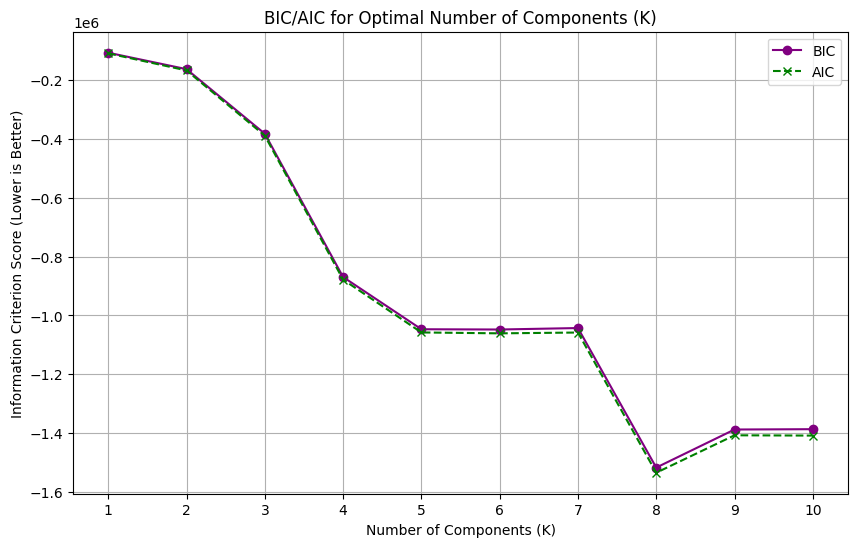

In [167]:
k_range = range(1, 11)
bic = []
aic = []


for k in k_range:
    gmm = GaussianMixture(n_components=k,covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

# 3. Plot the BIC and AIC scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, bic, marker='o', linestyle='-', color='purple', label='BIC')
plt.plot(k_range, aic, marker='x', linestyle='--', color='green', label='AIC')
plt.title('BIC/AIC for Optimal Number of Components (K)')
plt.xlabel('Number of Components (K)')
plt.ylabel('Information Criterion Score (Lower is Better)')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

##### 7.4 Customer Segmentation with DBSCAN - To be done by students